Accuracy: 0.6796116504854369


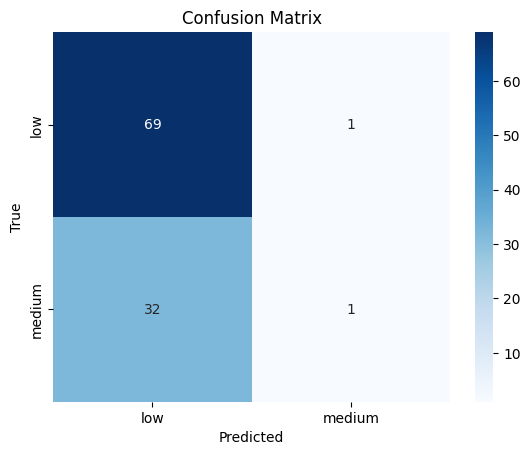

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data2.csv')

# Define the categories for obesity
thresholds = [10, 20, 30]  # Set your own thresholds here
labels = ['low', 'medium']

# Convert percent obesity values into categories
data['ObesityCategory'] = pd.cut(data['PercentObese'], bins=thresholds, labels=labels)

# Remove rows with missing values
data = data.dropna()

# Separate the features and the target variable
X = data.drop(['PercentObese', 'ObesityCategory'], axis=1)
y = data['ObesityCategory']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix heatmap
labels = sorted(data['ObesityCategory'].unique())
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

MSE and R-squared are commonly used for evaluating regression models, where the target variable is continuous. In classification models, the target variable consists of discrete classes, and accuracy or other classification metrics are more appropriate for evaluation.